**Problem Defination**

Speech Recognition is an important feature in several applications used such as home automation, artificial intelligence, etc. In many cases we need to convert the speech coming from live stream into text.

**Data**

Data has been taken from the : http://download.tensorflow.org/data/speech_commands_v0.01.tar.gz

**Features**

Data Contains a few informational files and a folder of audio files. The audio folder contains subfolders with 1 second clips of voice commands, with the folder name being the label of the audio clip. There are more labels that should be predicted. The labels you will need to predict in Test are yes, no, up, down, left, right, on, off, stop, go. Everything else should be considered either unknown or silence. The folder _background_noise_ contains longer clips of "silence" that you can break up and use as training input.

The files contained in the training audio are not uniquely named across labels, but they are unique if you include the label folder. For example, 00f0204f_nohash_0.wav is found in 14 folders, but that file is a different speech command in each folder.

The files are named so the first element is the subject id of the person who gave the voice command, and the last element indicated repeated commands. Repeated commands are when the subject repeats the same word multiple times. Subject id is not provided for the test data, and you can assume that the majority of commands in the test data were from subjects not seen in train.

You can expect some inconsistencies in the properties of the training data (e.g., length of the audio).

In [ ]:
!wget "http://download.tensorflow.org/data/speech_commands_v0.01.tar.gz"

--2020-11-27 17:28:16--  http://download.tensorflow.org/data/speech_commands_v0.01.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 142.250.31.128, 2607:f8b0:4004:c0b::80
Connecting to download.tensorflow.org (download.tensorflow.org)|142.250.31.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1489096277 (1.4G) [application/gzip]
Saving to: ‘speech_commands_v0.01.tar.gz’

speech_commands_v0. 100%[===================>]   1.39G   154MB/s    in 9.1s    

2020-11-27 17:28:26 (156 MB/s) - ‘speech_commands_v0.01.tar.gz’ saved [1489096277/1489096277]



In [ ]:
!tar -xvf 'speech_commands_v0.01.tar.gz' -C data/ 

Streaming output truncated to the last 5000 lines.
./up/6f9088d7_nohash_0.wav
./up/6f342826_nohash_0.wav
./up/e0a7c5a0_nohash_0.wav
./up/4d4e17f5_nohash_1.wav
./up/b0f24c9b_nohash_0.wav
./up/735845ab_nohash_2.wav
./up/53d5b86f_nohash_0.wav
./up/1a5b9ca4_nohash_1.wav
./up/23abe1c9_nohash_2.wav
./up/bdee441c_nohash_1.wav
./up/a1cff772_nohash_1.wav
./up/1ecfb537_nohash_3.wav
./up/37fc5d97_nohash_3.wav
./up/bd8412df_nohash_1.wav
./up/e53139ad_nohash_1.wav
./up/10ace7eb_nohash_3.wav
./up/30065f33_nohash_0.wav
./up/eefd26f3_nohash_0.wav
./up/c9b653a0_nohash_2.wav
./up/02746d24_nohash_0.wav
./up/e1469561_nohash_0.wav
./up/4bba14ce_nohash_0.wav
./up/b5d1e505_nohash_1.wav
./up/531a5b8a_nohash_1.wav
./up/0135f3f2_nohash_0.wav
./up/dbb40d24_nohash_4.wav
./up/e9287461_nohash_1.wav
./up/71e6ab20_nohash_0.wav
./up/ead2934a_nohash_1.wav
./up/f9af0887_nohash_0.wav
./up/ff63ab0b_nohash_0.wav
./up/f3d06008_nohash_0.wav
./up/918a2473_nohash_4.wav
./up/e54a0f16_nohash_0.wav
./up/cb8f8307_nohash_1.wav
./up

In [ ]:
import os 
import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile
import warnings
warnings.filterwarnings("ignore") 

### Data exploration and visualization

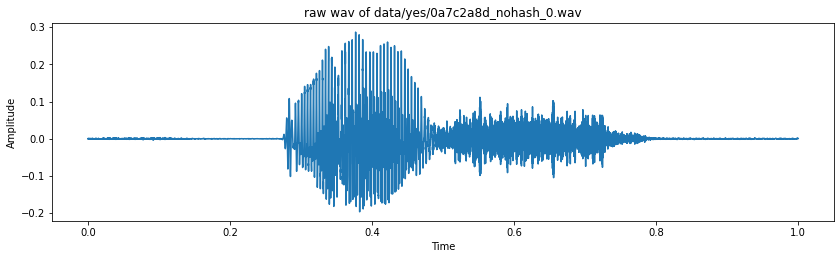

In [ ]:
train_audio_path='data/'
samples,sample_rate = librosa.load(train_audio_path+'yes/0a7c2a8d_nohash_0.wav',sr=16000)
fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(211)
ax1.set_title("raw wav of " +"data/yes/0a7c2a8d_nohash_0.wav")
ax1.set_xlabel("Time")
ax1.set_ylabel("Amplitude")
ax1.plot(np.linspace(0,sample_rate/len(samples),sample_rate),samples);



**Sampling rate**

The reason why I’m doing sample rate conversion is to transform data so that they all have the same shape and easy to be processed with machine learning models. But in real life, there are many more use cases of sample rate conversion.

In [ ]:
ipd.Audio(samples,rate=sample_rate)
print(sample_rate)

16000


#### Resampling

In [ ]:
samples = librosa.resample(samples,sample_rate,8000)
ipd.Audio(samples,rate=8000)

### Number of recording of each voice

In [ ]:
labels = os.listdir(train_audio_path)
labels

['cat',
 'dog',
 'six',
 'bird',
 'eight',
 'no',
 'tree',
 'marvin',
 'left',
 'down',
 'off',
 'on',
 'five',
 '_background_noise_',
 'three',
 'go',
 'seven',
 'sheila',
 'right',
 'four',
 'happy',
 'bed',
 'zero',
 'one',
 'wow',
 'two',
 'yes',
 'house',
 'up',
 'nine',
 '.ipynb_checkpoints',
 'stop']

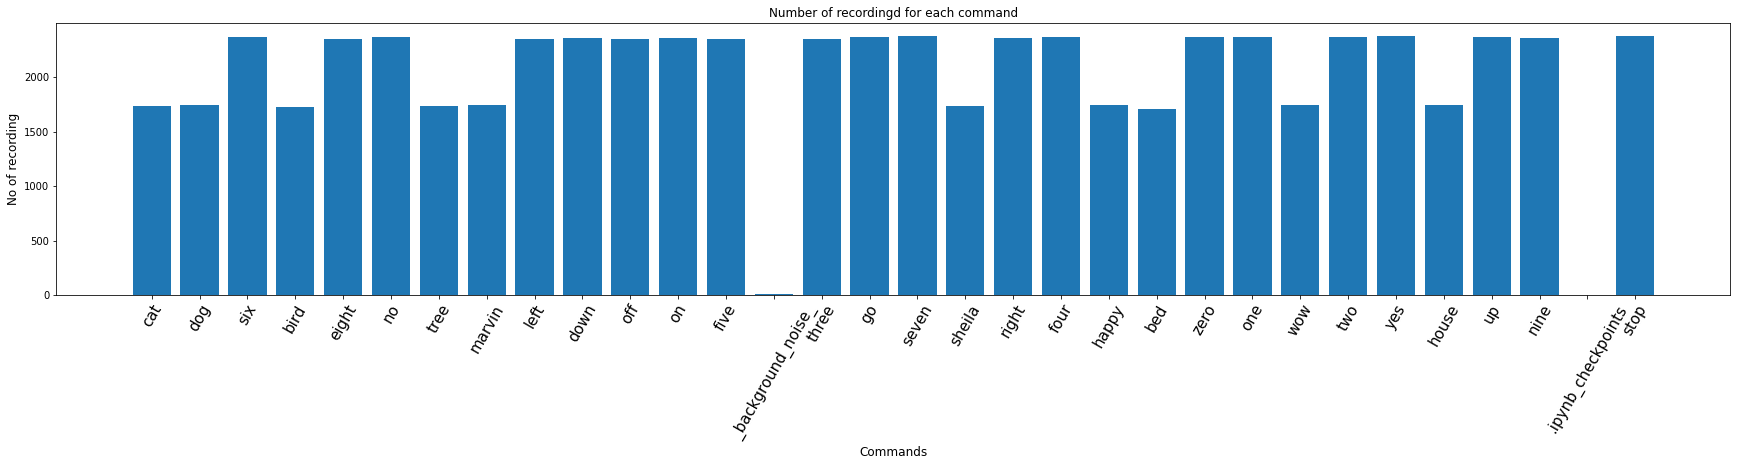

In [ ]:
labels = os.listdir(train_audio_path)
# Find the count of every wav file in different folder
no_of_recording=[]

for label in labels:
  waves = [f for f in os.listdir(train_audio_path+label) if f.endswith('.wav')]
  no_of_recording.append(len(waves))

# plot
fig = plt.figure(figsize=(30,5))
index = np.arange(len(labels))
plt.bar(index,no_of_recording)
plt.xlabel('Commands',fontsize=12)
plt.ylabel('No of recording',fontsize=12)
plt.xticks(index,labels,fontsize=15,rotation=60)
plt.title('Number of recordingd for each command')
plt.show()

labels=["yes","no","up","down","left","right","on","off","stop","go"]




### Duration of recordings

(array([1.5000e+01, 3.0000e+01, 4.4000e+01, 1.3800e+02, 1.3600e+02,
        1.7900e+02, 3.6600e+02, 4.3400e+02, 5.9300e+02, 2.1747e+04]),
 array([0.418 , 0.4762, 0.5344, 0.5926, 0.6508, 0.709 , 0.7672, 0.8254,
        0.8836, 0.9418, 1.    ]),
 <a list of 10 Patch objects>)

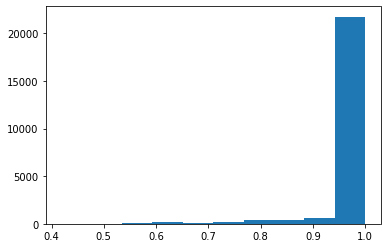

In [ ]:
duration_of_recording=[]

for label in labels:
  waves = [f for f in os.listdir(train_audio_path+ '/' +label) if f.endswith('.wav')]
  for wav in waves:
    sample_rate,samples = wavfile.read(train_audio_path+ '/' +label+ '/' +wav)
    duration_of_recording.append(float(len(samples)/sample_rate))

plt.hist(np.array(duration_of_recording))

In [ ]:
train_audio_path = 'data'

all_wave = []
all_label = []
for label in labels:
    print(label)
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    for wav in waves:
        samples, sample_rate = librosa.load(train_audio_path + '/' + label + '/' + wav, sr = 16000)
        samples = librosa.resample(samples, sample_rate, 8000)
        if(len(samples)== 8000) : 
            all_wave.append(samples)
            all_label.append(label)

yes
no
up
down
left
right
on
off
stop
go


#### Preprocess

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y=le.fit_transform(all_label)
classes= list(le.classes_)

In [ ]:
from keras.utils import np_utils
y=np_utils.to_categorical(y, num_classes=len(labels))
all_wave = np.array(all_wave).reshape(-1,8000,1)


#### Splitiing the data

In [ ]:
from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val = train_test_split(np.array(all_wave),np.array(y),stratify=y,test_size = 0.2,random_state=777,shuffle=True)

## Building a model

In [ ]:
from keras.layers import Dense, Dropout, Flatten, Conv1D, Input, MaxPooling1D
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
K.clear_session()

inputs = Input(shape=(8000,1))

#First Conv1D layer
conv = Conv1D(8,13, padding='valid', activation='relu', strides=1)(inputs)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.2)(conv)

#Second Conv1D layer
conv = Conv1D(16, 11, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.2)(conv)

#Third Conv1D layer
conv = Conv1D(32, 9, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.2)(conv)

#Fourth Conv1D layer
conv = Conv1D(64, 7, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.2)(conv)

#Flatten layer
conv = Flatten()(conv)

#Dense Layer 1
conv = Dense(256, activation='relu')(conv)
conv = Dropout(0.2)(conv)

#Dense Layer 2
conv = Dense(128, activation='relu')(conv)
conv = Dropout(0.2)(conv)

outputs = Dense(len(labels), activation='softmax')(conv)

model = Model(inputs, outputs)
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 8000, 1)]         0         
_________________________________________________________________
conv1d (Conv1D)              (None, 7988, 8)           112       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 2662, 8)           0         
_________________________________________________________________
dropout (Dropout)            (None, 2662, 8)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 2652, 16)          1424      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 884, 16)           0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 884, 16)          

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])


In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, min_delta=0.00001) 
mc = ModelCheckpoint('best_model.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [ ]:
history=model.fit(x_tr, y_tr ,epochs=100, callbacks=[es,mc], batch_size=32, validation_data=(x_val,y_val))

Epoch 1/100
533/533 [==============================] - 5s 9ms/step - loss: 2.2980 - accuracy: 0.1102 - val_loss: 2.2951 - val_accuracy: 0.1457
Epoch 2/100
533/533 [==============================] - 4s 8ms/step - loss: 2.2858 - accuracy: 0.1396 - val_loss: 2.2825 - val_accuracy: 0.1520
Epoch 3/100
533/533 [==============================] - 4s 8ms/step - loss: 2.2685 - accuracy: 0.1553 - val_loss: 2.2619 - val_accuracy: 0.1748
Epoch 4/100
533/533 [==============================] - 4s 8ms/step - loss: 2.2414 - accuracy: 0.1700 - val_loss: 2.2224 - val_accuracy: 0.1902
Epoch 5/100
533/533 [==============================] - 4s 8ms/step - loss: 2.1996 - accuracy: 0.1886 - val_loss: 2.1639 - val_accuracy: 0.2212
Epoch 6/100
533/533 [==============================] - 4s 8ms/step - loss: 2.1581 - accuracy: 0.2002 - val_loss: 2.1217 - val_accuracy: 0.2318
Epoch 7/100
533/533 [==============================] - 4s 8ms/step - loss: 2.1155 - accuracy: 0.2113 - val_loss: 2.0885 - val_accuracy: 0.2365

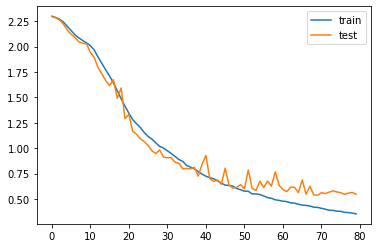

In [ ]:
from matplotlib import pyplot 
pyplot.plot(history.history['loss'], label='train') 
pyplot.plot(history.history['val_loss'], label='test') 
pyplot.legend()
pyplot.show()

In [ ]:
def predict(audio):
    prob=model.predict(audio.reshape(1,8000,1))
    index=np.argmax(prob[0])
    return classes[index]

In [ ]:
import random
index=random.randint(0,len(x_val)-1)
samples=x_val[index].ravel()
print("Audio:",classes[np.argmax(y_val[index])])
ipd.Audio(samples, rate=8000)
print("Text:",predict(samples))

Audio: go
Text: go
